In [376]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"

--2023-10-02 10:33:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-10-02 10:33:19 (7.81 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [377]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"]
               )

In [379]:
df.head

<bound method NDFrame.head of            Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC           123.654990      124.304660      124.751660   
2013-10-02      BTC           125.455000      123.654990      125.758500   
2013-10-03      BTC           108.584830      125.455000      125.665660   
2013-10-04      BTC           118.674660      108.584830      118.675000   
2013-10-05      BTC           121.338660      118.674660      121.936330   
...             ...                  ...             ...             ...   
2021-05-14      BTC         49764.132082    49596.778891    51448.798576   
2021-05-15      BTC         50032.693137    49717.354353    51578.312545   
2021-05-16      BTC         47885.625255    49926.035067    50690.802950   
2021-05-17      BTC         45604.615754    46805.537852    49670.414174   
2021-05-18      BTC         43144.471291    46439.336570  

In [380]:
len(df)

2787

<Axes: xlabel='Date'>

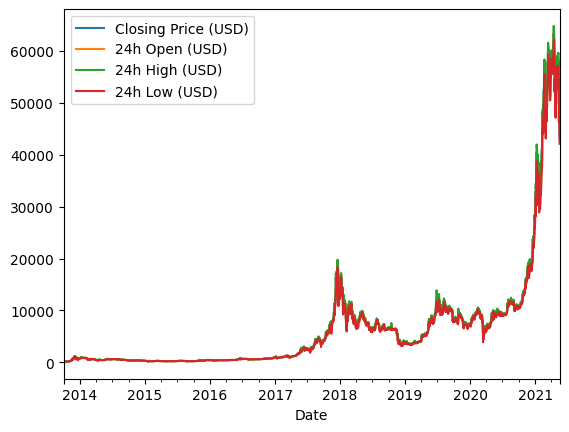

In [381]:
df.plot()

In [382]:
df.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [383]:
import pandas as pd

df_sm = df[['Closing Price (USD)']].copy()
df_sm.reset_index(inplace=True)
df_sm.columns = ['Date', 'price']


In [384]:
df_sm

,Date,price
0,2013-10-01,123.654990
1,2013-10-02,125.455000
2,2013-10-03,108.584830
3,2013-10-04,118.674660
4,2013-10-05,121.338660
...,...,...
2782,2021-05-14,49764.132082
2783,2021-05-15,50032.693137
2784,2021-05-16,47885.625255
2785,2021-05-17,45604.615754


In [385]:
import tensorflow as tf

In [386]:
size=int(0.8*len(df_sm['price']))
date=df_sm["Date"]
price=df_sm["price"]
X_train,X_test=date[:size],date[size:]

In [387]:
y_train,y_test=price[:size],price[size:]

In [388]:
X_train


0      2013-10-01
1      2013-10-02
2      2013-10-03
3      2013-10-04
4      2013-10-05
          ...    
2224   2019-11-03
2225   2019-11-04
2226   2019-11-05
2227   2019-11-06
2228   2019-11-07
Name: Date, Length: 2229, dtype: datetime64[ns]

In [389]:
X_test

2229   2019-11-08
2230   2019-11-09
2231   2019-11-10
2232   2019-11-11
2233   2019-11-12
          ...    
2782   2021-05-14
2783   2021-05-15
2784   2021-05-16
2785   2021-05-17
2786   2021-05-18
Name: Date, Length: 558, dtype: datetime64[ns]

In [390]:
y_train,y_test

(0        123.654990
 1        125.455000
 2        108.584830
 3        118.674660
 4        121.338660
            ...     
 2224    9290.896602
 2225    9202.415451
 2226    9369.628081
 2227    9326.599624
 2228    9335.752402
 Name: price, Length: 2229, dtype: float64,
 2229     9226.485821
 2230     8794.358645
 2231     8798.042055
 2232     9081.186878
 2233     8711.534339
             ...     
 2782    49764.132082
 2783    50032.693137
 2784    47885.625255
 2785    45604.615754
 2786    43144.471291
 Name: price, Length: 558, dtype: float64)

<Axes: xlabel='Date', ylabel='price'>

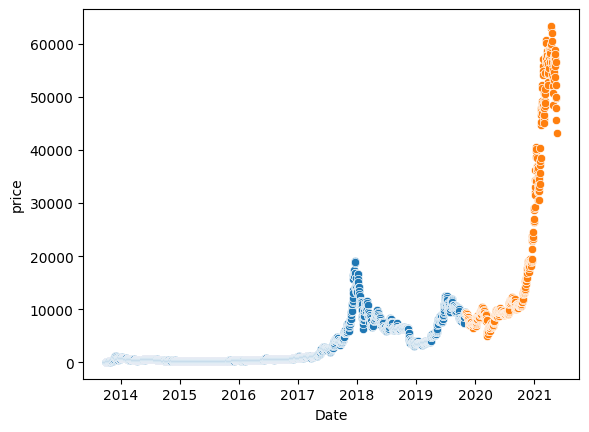

In [391]:

# figure=plt.figure(figsize=(15,7))
sns.scatterplot(x=X_train,y=y_train)
sns.scatterplot(x=X_test,y=y_test)

In [392]:
naive_forecast=y_test[:-1]

In [393]:
naive_forecast

2229     9226.485821
2230     8794.358645
2231     8798.042055
2232     9081.186878
2233     8711.534339
            ...     
2781    52147.821187
2782    49764.132082
2783    50032.693137
2784    47885.625255
2785    45604.615754
Name: price, Length: 557, dtype: float64

In [394]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [395]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [396]:
dict1=evaluate_preds(y_test[1:],naive_forecast)

In [397]:
price

0         123.654990
1         125.455000
2         108.584830
3         118.674660
4         121.338660
            ...     
2782    49764.132082
2783    50032.693137
2784    47885.625255
2785    45604.615754
2786    43144.471291
Name: price, Length: 2787, dtype: float64

In [398]:
window_size=7
horizon=1


In [399]:
dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    price,
    targets=None,  # In this case, we won't have separate target values; we'll predict the next value.
    sequence_length=window_size + horizon,  # Total length of each sequence (window + horizon)
    sequence_stride=1,  # How much the window moves forward after each sequence
    batch_size=1,  # Batch size of 1 since we're creating one sample at a time
    shuffle=False,  # Keep the order of the dataset
)

In [400]:
dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, None), dtype=tf.float64, name=None)>

In [401]:
input_sequences = []
output_sequences = []

In [402]:
import numpy as np

In [403]:
for batch in dataset:
    inputs = batch[:, :-horizon].numpy().flatten()
    target = batch[:, -horizon:].numpy().flatten()

    input_sequences.append(inputs)
    output_sequences.append(target)

# Convert the input and output sequences to numpy arrays
input_sequences = np.array(input_sequences)
output_sequences = np.array(output_sequences)

print("Input Sequences:")
print(input_sequences)

print("Output Sequences:")
print(output_sequences)

Input Sequences:
[[  123.65499      125.455        108.58483    ...   121.33866
    120.65533      121.795     ]
 [  125.455        108.58483      118.67466    ...   120.65533
    121.795        123.033     ]
 [  108.58483      118.67466      121.33866    ...   121.795
    123.033        124.049     ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 52147.82118698
  49764.1320816  50032.69313676]
 [58102.19142623 55715.54665129 56573.5554719  ... 49764.1320816
  50032.69313676 47885.62525472]
 [55715.54665129 56573.5554719  52147.82118698 ... 50032.69313676
  47885.62525472 45604.61575361]]
Output Sequences:
[[  123.033     ]
 [  124.049     ]
 [  125.96116   ]
 ...
 [47885.62525472]
 [45604.61575361]
 [43144.47129086]]


In [404]:
size=int(0.8*len(input_sequences))
train_windows=input_sequences[:size]
print(size)

2224


In [405]:
test_windows=input_sequences[size:]

In [406]:
train_horizons=output_sequences[:size]
test_horizons=output_sequences[size:]

In [407]:
train_horizons,test_horizons

(array([[ 123.033     ],
        [ 124.049     ],
        [ 125.96116   ],
        ...,
        [9335.75240233],
        [9226.48582088],
        [8794.35864452]]),
 array([[ 8798.04205463],
        [ 9081.18687849],
        [ 8711.53433917],
        [ 8760.89271814],
        [ 8749.52059102],
        [ 8656.97092235],
        [ 8500.64355816],
        [ 8469.2608989 ],
        [ 8537.33965197],
        [ 8205.80636599],
        [ 8118.4885358 ],
        [ 8074.84317361],
        [ 7612.7405735 ],
        [ 7262.11053495],
        [ 7303.40575852],
        [ 7041.73293642],
        [ 7211.86180875],
        [ 7141.06944869],
        [ 7523.4806726 ],
        [ 7390.20746923],
        [ 7729.26593894],
        [ 7542.23560864],
        [ 7381.96300782],
        [ 7333.43293049],
        [ 7315.36776456],
        [ 7213.73376172],
        [ 7398.78704961],
        [ 7511.88058312],
        [ 7532.12351309],
        [ 7550.23919987],
        [ 7333.09604316],
        [ 7239.76257544],
   

In [408]:
len(train_windows),len(train_horizons),len(test_windows),len(test_horizons)

(2224, 2224, 556, 556)

In [409]:
len(output_sequences)

2780

In [410]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]


In [411]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [412]:
price.dtype

dtype('float64')

In [413]:
import numpy as np

# Convert the "price" data to a NumPy array
price_array = price.values

In [414]:
full_windows, full_labels = make_windows(price_array, 7, 1)
len(full_windows), len(full_labels)

(2780, 2780)

In [415]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [416]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [417]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2224, 556, 2224, 556)

In [418]:

# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-1-1]), y_train[7:])

True

In [419]:
inputs=tf.keras.layers.Input(shape=(7,))
x=tf.keras.layers.Dense(128,activation="relu")(inputs)
outputs=tf.keras.layers.Dense(1,activation=None)(x)
model0=tf.keras.Model(inputs,outputs)

model0.compile(optimizer="adam",metrics=['mean_absolute_error'],loss=tf.keras.losses.MeanAbsoluteError())

In [420]:
model0.fit(x=train_windows,y=train_labels,validation_data=(test_windows,test_labels),epochs=100,batch_size=128)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 924.6779 - mean_absolute_error: 924.6779 - val_loss: 2599.9111 - val_mean_absolute_error: 2599.9111
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 276.9535 - mean_absolute_error: 276.9535 - val_loss: 1221.5050 - val_mean_absolute_error: 1221.5050
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 209.5423 - mean_absolute_error: 209.5423 - val_loss: 1089.0961 - val_mean_absolute_error: 1089.0961
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 196.7808 - mean_absolute_error: 196.7808 - val_loss: 1065.8582 - val_mean_absolute_error: 1065.8582
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 193.1388 - mean_absolute_error: 193.1388 - val_loss: 1065.6072 - val_mean_absolute_error: 1065.6072
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 187.9491 - mean_absolute_error: 187.9491 - val_loss: 1037.488

In [421]:
model0.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 752.3854 - mean_absolute_error: 752.3854


[752.3854370117188, 752.3854370117188]

In [422]:
pred0=model0.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [423]:
# model00=tf.keras.Sequential()
# model00.add(tf.keras.layers.Dense(128,activation="relu"))
# model00.add(tf.keras.layers.Dense(1,activation="linear"))

# model00.compile(optimizer="adam",loss="mean_absolute_error",metrics=['mean_absolute_error'])

In [424]:
dict2=evaluate_preds(tf.squeeze(test_labels),pred0.flatten())

In [425]:
dict2

{'mae': 752.3856,
 'mse': 1603555.0,
 'rmse': 1266.3156,
 'mape': 3.555435,
 'mase': 1.3217331}

<Axes: >

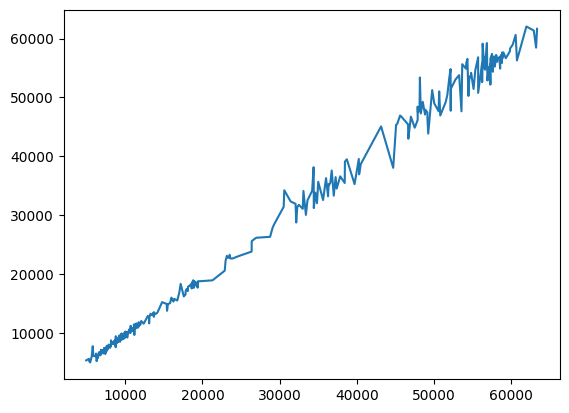

In [426]:
sns.lineplot(x=tf.squeeze(test_labels),y=pred0.flatten())

In [427]:
model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(128,input_shape=(30,),activation="relu"))
model1.add(tf.keras.layers.Dense(1,activation=None))

model1.compile(optimizer="adam",loss="mae",metrics=['mae'])

In [428]:
def make_windows(x, window_size, horizon):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [429]:
full_windows, full_labels = make_windows(price_array, 30, 1)
len(full_windows), len(full_labels)

(2757, 2757)

In [430]:
full_labels[0]

array([196.02499])

In [431]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [432]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [433]:

# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-1-1]), y_train[30:])

False

In [434]:
train_windows.shape,train_labels.shape,test_windows.shape,test_labels.shape

((2205, 30), (2205, 1), (552, 30), (552, 1))

In [435]:
model1.fit(x=train_windows,y=train_labels,validation_data=(test_windows,test_labels),epochs=100,batch_size=128)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 891.3818 - mae: 891.3818 - val_loss: 3005.1343 - val_mae: 3005.1343
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 360.0300 - mae: 360.0300 - val_loss: 1291.9938 - val_mae: 1291.9938
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 256.7276 - mae: 256.7276 - val_loss: 1180.3473 - val_mae: 1180.3473
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 214.1198 - mae: 214.1198 - val_loss: 1048.8545 - val_mae: 1048.8545
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 176.9149 - mae: 176.9149 - val_loss: 988.0015 - val_mae: 988.0015
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 166.9597 - mae: 166.9597 - val_loss: 966.8638 - val_mae: 966.8638
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 163.4396 - mae: 163.4396 - val_loss: 878.1141 - val_mae: 878.1141
Epoch 8/100
18/18 

In [436]:
model1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 595.9007 - mae: 595.9007


[595.9006958007812, 595.9006958007812]

In [437]:
pred1=model1.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [438]:
tf.squeeze(pred1).shape,tf.squeeze(test_labels).shape

(TensorShape([552]), TensorShape([552]))

<Axes: >

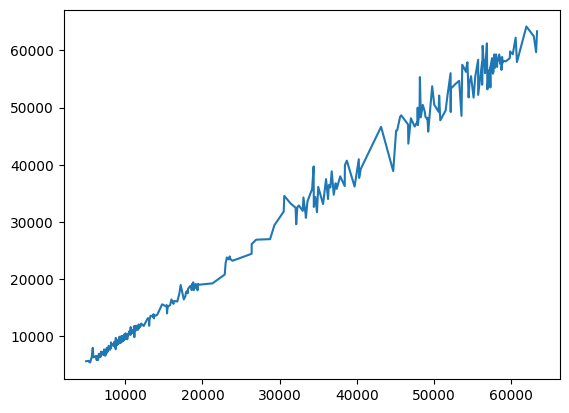

In [439]:
sns.lineplot(x=tf.squeeze(test_labels),y=tf.squeeze(pred1))

In [440]:
pred1.shape,test_labels.shape

((552, 1), (552, 1))

In [441]:
dict3=evaluate_preds(tf.squeeze(test_labels),pred1.flatten())

In [442]:
dict3

{'mae': 595.9007,
 'mse': 1246638.0,
 'rmse': 1116.5294,
 'mape': 2.6755993,
 'mase': 1.0416402}

In [443]:
full_windows, full_labels = make_windows(price_array, 30, 7)
len(full_windows), len(full_labels)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
train_windows.shape,train_labels.shape,test_windows.shape,test_labels.shape

((2200, 30), (2200, 7), (551, 30), (551, 7))

In [444]:
inputs=tf.keras.layers.Input(shape=(30,))
x=tf.keras.layers.Dense(128,activation="relu")(inputs)
outputs=tf.keras.layers.Dense(1,activation=None)(x)

model2=tf.keras.Model(inputs,outputs)
model2.compile(optimizer="adam",loss="mae",metrics=['mae'])

In [445]:
model2.fit(x=train_windows,y=train_labels,validation_data=(test_windows,test_labels),epochs=100,batch_size=128)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 1224.5454 - mae: 1224.5454 - val_loss: 4917.8032 - val_mae: 4917.8032
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 516.3333 - mae: 516.3333 - val_loss: 1875.4745 - val_mae: 1875.4745
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 342.7242 - mae: 342.7242 - val_loss: 1899.3838 - val_mae: 1899.3838
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 316.9434 - mae: 316.9434 - val_loss: 1539.0341 - val_mae: 1539.0341
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 277.6693 - mae: 277.6693 - val_loss: 1509.0481 - val_mae: 1509.0481
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 264.4803 - mae: 264.4803 - val_loss: 1504.0557 - val_mae: 1504.0557
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 258.0792 - mae: 258.0792 - val_loss: 1423.3408 - val_mae: 1423.3408
Epoch 8/10

In [446]:
model2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1199.4250 - mae: 1199.4250


[1199.425048828125, 1199.425048828125]

In [447]:
pred2=model2.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [448]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [449]:
dict4=evaluate_preds(test_labels,pred2)

In [450]:
dict4

{'mae': 1199.425,
 'mse': 5167174.5,
 'rmse': 1375.4528,
 'mape': 5.3789463,
 'mase': 2.1343095}

<Axes: >

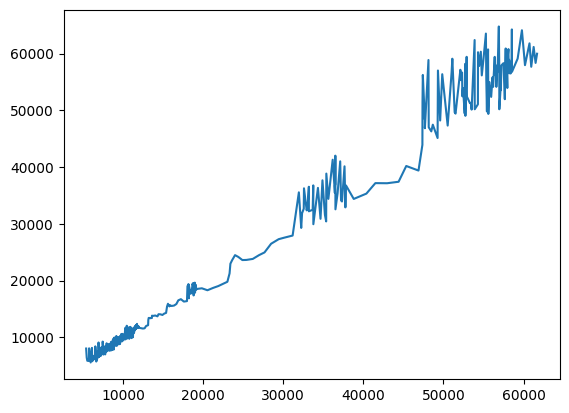

In [451]:
sns.lineplot(x=tf.reduce_mean(test_labels,axis=1),y=pred2.flatten())

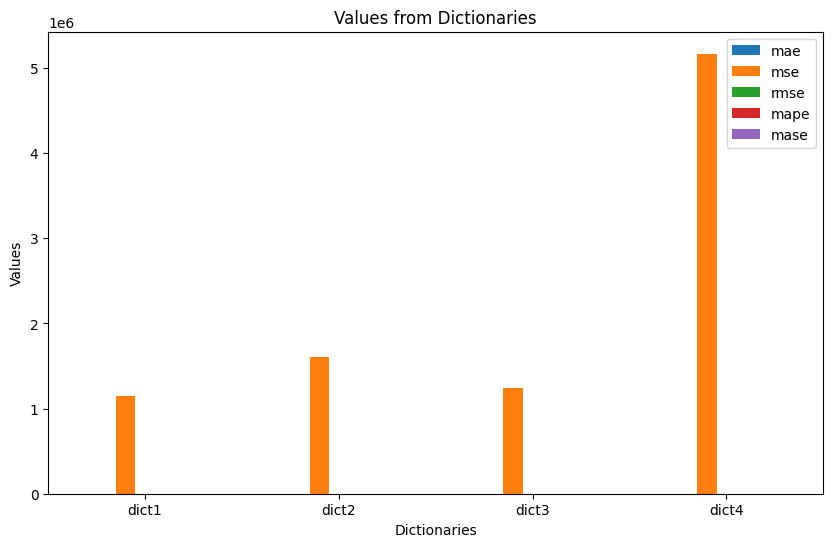

In [452]:
df = pd.DataFrame({'dict1': dict1, 'dict2': dict2, 'dict3': dict3, 'dict4': dict4})

# Transpose the DataFrame for a better visualization
df = df.T

# Plot a barplot
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Dictionaries')
plt.ylabel('Values')
plt.title('Values from Dictionaries')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [453]:
full_windows, full_labels = make_windows(price_array, 7, 1)
len(full_windows), len(full_labels)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
train_windows.shape,train_labels.shape,test_windows.shape,test_labels.shape

((2224, 7), (2224, 1), (556, 7), (556, 1))

In [454]:
train_windows.shape,test_windows.shape,train_labels.shape,test_labels.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

In [455]:
expand_dims_layer=tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [456]:
inputs=tf.keras.layers.Input(shape=(7,))

# x=tf.keras.layers.Dense(128,activation="relu")(inputs)
x=expand_dims_layer(inputs)
x=tf.keras.layers.Conv1D(filters=128,
                         kernel_size=3,
                         strides=1,
                         padding="causal",
                         activation="relu"
                         )(x)
outputs=tf.keras.layers.Dense(1,activation=None)(x)
model4=tf.keras.Model(inputs,outputs)

In [457]:
model4.compile(optimizer="adam",loss="mae",metrics=['mae'])

In [458]:
model4.fit(x=train_windows,y=train_labels,validation_data=(test_windows,test_labels),epochs=100,batch_size=128)

Epoch 1/100
18/18 [==============================] - 1s 21ms/step - loss: 1849.7345 - mae: 1849.7345 - val_loss: 1501.2949 - val_mae: 1501.2949
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 347.7420 - mae: 347.7420 - val_loss: 1659.3572 - val_mae: 1659.3572
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 238.2404 - mae: 238.2404 - val_loss: 1151.4447 - val_mae: 1151.4447
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 208.8089 - mae: 208.8089 - val_loss: 1130.8778 - val_mae: 1130.8778
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 201.1496 - mae: 201.1496 - val_loss: 1119.2312 - val_mae: 1119.2312
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 196.9935 - mae: 196.9935 - val_loss: 1094.9471 - val_mae: 1094.9471
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 191.9493 - mae: 191.9493 - val_loss: 1053.3204 - val_mae: 1053.3204
Epoch 8/10

In [459]:
model4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 626.1605 - mae: 626.1605


[626.1605224609375, 626.1605224609375]

In [460]:
dict5=evaluate_preds(tf.squeeze(test_labels),model4.predict(test_windows).flatten())

18/18 [==============================] - 0s 2ms/step


In [461]:
dict5

{'mae': 626.16046,
 'mse': 1280001.6,
 'rmse': 1131.3716,
 'mape': 2.8611026,
 'mase': 1.0999905}

18/18 [==============================] - 0s 2ms/step


<Axes: >

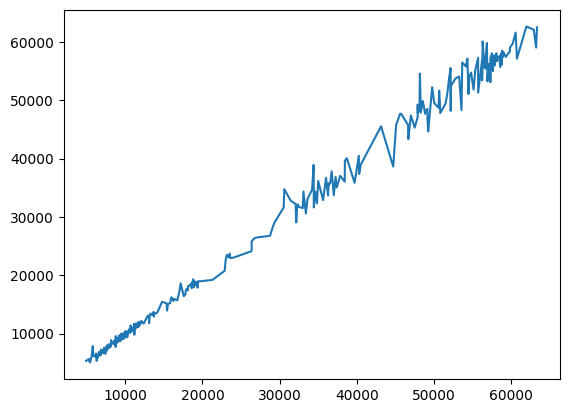

In [462]:
sns.lineplot(x=tf.squeeze(test_labels),y=model4.predict(test_windows).flatten())

In [463]:
inputs=tf.keras.layers.Input(shape=(7,))
x=expand_dims_layer(inputs)
# x=tf.keras.layers.LSTM(units=128,activation="relu",return_sequences=True)(x)
x=tf.keras.layers.LSTM(units=128,activation="relu")(x)
# x=tf.keras.layers.Dense(128,activation="relu")(x)
outputs=tf.keras.layers.Dense(1,activation=None)(x)

model5=tf.keras.Model(inputs,outputs)

In [464]:
model5.compile(optimizer="adam",loss="mae",metrics=['mae'])

In [465]:
model5.fit(x=train_windows,y=train_labels,validation_data=(test_windows,test_labels),epochs=100,batch_size=128)

Epoch 1/100
18/18 [==============================] - 34s 25ms/step - loss: 1969.8302 - mae: 1969.8302 - val_loss: 6502.0557 - val_mae: 6502.0557
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 426.1134 - mae: 426.1134 - val_loss: 1814.6830 - val_mae: 1814.6830
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 222.9457 - mae: 222.9457 - val_loss: 1182.9417 - val_mae: 1182.9417
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 189.9863 - mae: 189.9863 - val_loss: 1098.1794 - val_mae: 1098.1794
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 185.3564 - mae: 185.3564 - val_loss: 1057.2277 - val_mae: 1057.2277
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 182.8487 - mae: 182.8487 - val_loss: 1024.7162 - val_mae: 1024.7162
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 184.3944 - mae: 184.3944 - val_loss: 1021.2812 - val_mae: 1021.2812
Epoch 8/1

In [466]:
model5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 595.9439 - mae: 595.9439


[595.9439086914062, 595.9439086914062]

In [467]:
dict6=evaluate_preds(tf.squeeze(test_labels),model5.predict(test_windows).flatten())

18/18 [==============================] - 0s 2ms/step


In [468]:
dict6

{'mae': 595.944,
 'mse': 1262199.9,
 'rmse': 1123.4767,
 'mape': 2.70461,
 'mase': 1.0469085}

18/18 [==============================] - 0s 2ms/step


<Axes: >

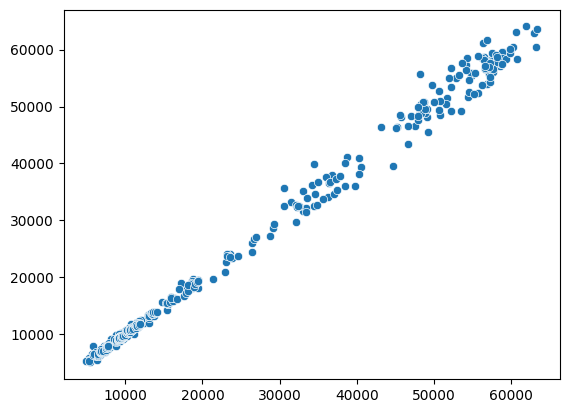

In [469]:
sns.scatterplot(x=tf.squeeze(test_labels),y=model5.predict(test_windows).flatten())

In [470]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [471]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - df_sm['Date'][0]).days
block_reward_3_days = (block_reward_4_datetime - df_sm['Date'][0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [472]:
# Add block_reward column
bitcoin_prices_block = df_sm.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()


,Date,price,block_reward
0,2013-10-01,123.65499,25
1,2013-10-02,125.45500,25
2,2013-10-03,108.58483,25
3,2013-10-04,118.67466,25
4,2013-10-05,121.33866,25


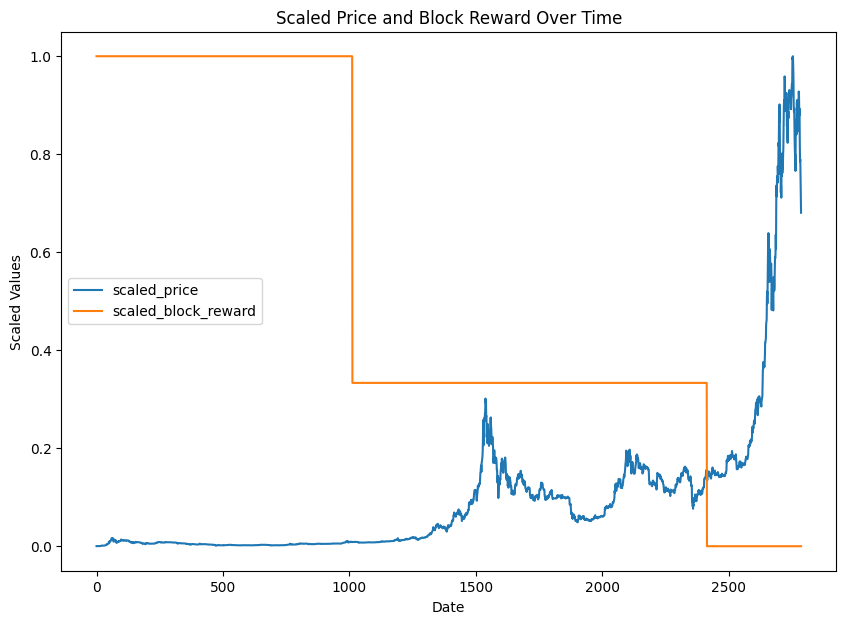

In [473]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

# Assuming you've already created the "bitcoin_prices_block" DataFrame
# It should contain both "price" and "block_reward" columns

# Scale the "price" and "block_reward" columns
scaled_data = minmax_scale(bitcoin_prices_block[['price', 'block_reward']])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_price', 'scaled_block_reward'], index=bitcoin_prices_block.index)

# Plot the scaled columns
scaled_df.plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.title('Scaled Price and Block Reward Over Time')
plt.show()


In [474]:
print(df_sm.columns)


Index(['Date', 'price'], dtype='object')


In [475]:
HORIZON = 1
WINDOW_SIZE = 7

In [476]:
X = bitcoin_prices_windowed.loc[:, "block_reward":]

In [477]:
X

,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
0,25,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
1,25,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2,25,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
3,25,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
4,25,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...
2775,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2776,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2777,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2778,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426


In [478]:

# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"price+{i+1}"] = bitcoin_prices_windowed["price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)
bitcoin_prices_windowed = bitcoin_prices_windowed.dropna()

# Reset the index of the DataFrame after removing rows
bitcoin_prices_windowed = bitcoin_prices_windowed.reset_index(drop=True)
bitcoin_prices_windowed

,Date,price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
0,2013-10-08,123.033000,25,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
1,2013-10-09,124.049000,25,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2,2013-10-10,125.961160,25,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
3,2013-10-11,125.279660,25,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
4,2013-10-12,125.927500,25,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...,...,...
2775,2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2776,2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2777,2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2778,2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426


In [479]:
X = bitcoin_prices_windowed.loc[:, "block_reward":]

In [480]:
X
y=bitcoin_prices_windowed['price']

In [481]:
y

0         123.033000
1         124.049000
2         125.961160
3         125.279660
4         125.927500
            ...     
2775    49764.132082
2776    50032.693137
2777    47885.625255
2778    45604.615754
2779    43144.471291
Name: price, Length: 2780, dtype: float64

In [482]:
# Assuming you already have X defined
import numpy as np

# Define the columns to be cast to float32
columns_to_cast = X.columns[X.columns.get_loc("block_reward"):]

# Cast the selected columns to float32
X[columns_to_cast] = X[columns_to_cast].astype(np.float32)

# Check the data type of X after casting
print(X.dtypes)


block_reward    float32
price+1         float32
price+2         float32
price+3         float32
price+4         float32
price+5         float32
price+6         float32
price+7         float32
dtype: object


In [483]:

# View labels
y.head()

0    123.03300
1    124.04900
2    125.96116
3    125.27966
4    125.92750
Name: price, dtype: float64

In [484]:
X['price+1']

0         121.794998
1         123.032997
2         124.049004
3         125.961159
4         125.279663
            ...     
2775    52147.820312
2776    49764.132812
2777    50032.691406
2778    47885.625000
2779    45604.617188
Name: price+1, Length: 2780, dtype: float32

In [485]:
X['block_reward']

0       25.00
1       25.00
2       25.00
3       25.00
4       25.00
        ...  
2775     6.25
2776     6.25
2777     6.25
2778     6.25
2779     6.25
Name: block_reward, Length: 2780, dtype: float32

In [486]:
X.columns

Index(['block_reward', 'price+1', 'price+2', 'price+3', 'price+4', 'price+5',
       'price+6', 'price+7'],
      dtype='object')

In [487]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [488]:
X_train['block_reward'].dtype

dtype('float32')

In [489]:
inputs=tf.keras.layers.Input(8,)
x=tf.keras.layers.Dense(128,activation="relu")(inputs)
outputs=tf.keras.layers.Dense(1,activation=None)(x)

model7=tf.keras.Model(inputs,outputs)

In [490]:
model7.compile(optimizer="adam",loss="mae",metrics=['mae'])

In [491]:
model7.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=100,batch_size=128)

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 1530.5204 - mae: 1530.5204 - val_loss: 2137.4785 - val_mae: 2137.4785
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 337.9237 - mae: 337.9237 - val_loss: 1468.6039 - val_mae: 1468.6039
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 173.7082 - mae: 173.7082 - val_loss: 1101.9575 - val_mae: 1101.9575
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 151.5296 - mae: 151.5296 - val_loss: 812.1838 - val_mae: 812.1838
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 143.4124 - mae: 143.4124 - val_loss: 795.2820 - val_mae: 795.2820
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 143.1360 - mae: 143.1360 - val_loss: 778.2667 - val_mae: 778.2667
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 138.5020 - mae: 138.5020 - val_loss: 767.8607 - val_mae: 767.8607
Epoch 8/100
18/18 

In [492]:
model7.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 629.7286 - mae: 629.7286


[629.7286376953125, 629.7286376953125]

In [493]:
dict7=evaluate_preds(tf.squeeze(y_test),model7.predict(X_test).flatten())

18/18 [==============================] - 0s 1ms/step


18/18 [==============================] - 0s 1ms/step


<Axes: >

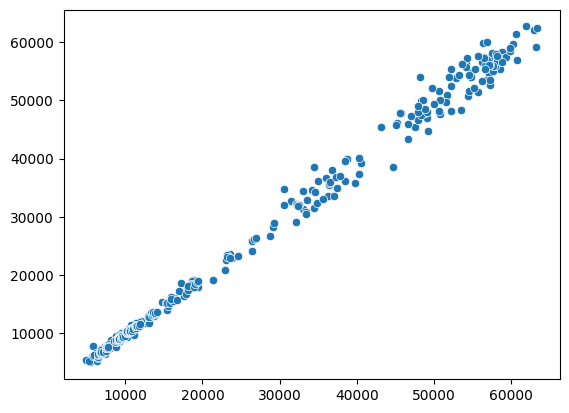

In [494]:
sns.scatterplot(x=tf.squeeze(y_test),y=model7.predict(X_test).flatten())

In [495]:
X1=X['block_reward']
split_size = int(len(X1) * 0.8)
X1_train, y_train = X1[:split_size], y[:split_size]
X1_test, y_test = X1[split_size:], y[split_size:]
len(X1_train), len(y_train), len(X1_test), len(y_test)

(2224, 2224, 556, 556)

In [496]:
X1_train

0       25.0
1       25.0
2       25.0
3       25.0
4       25.0
        ... 
2219    12.5
2220    12.5
2221    12.5
2222    12.5
2223    12.5
Name: block_reward, Length: 2224, dtype: float32

In [497]:
X2=X[['price+1', 'price+2', 'price+3', 'price+4', 'price+5',
       'price+6', 'price+7']]

split_size = int(len(X2) * 0.8)
X2_train, y_train = X2[:split_size], y[:split_size]
X2_test, y_test = X2[split_size:], y[split_size:]
len(X2_train), len(y_train), len(X2_test), len(y_test)

(2224, 2224, 556, 556)

In [498]:
X2_test

,price+1,price+2,price+3,price+4,price+5,price+6,price+7
2224,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039,9290.896484
2225,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039
2226,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930
2227,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609
2228,8760.892578,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953
...,...,...,...,...,...,...,...
2775,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094,56583.851562
2776,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094
2777,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938
2778,47885.625000,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406


In [499]:
inputs1=tf.keras.layers.Input(shape=(1,))
outputs1=tf.keras.layers.Dense(128,activation="relu")(inputs1)

m1=tf.keras.Model(inputs1,outputs1)

inputs2=tf.keras.layers.Input(shape=(7,))
outputs2=tf.keras.layers.Dense(128,activation="relu")(inputs2)

m2=tf.keras.Model(inputs2,outputs2)

concat=tf.keras.layers.Concatenate()([m1.output,m2.output])

output=tf.keras.layers.Dense(1,activation=None)(concat)

model=tf.keras.Model([m1.input,m2.input],output)

In [500]:
model.compile(optimizer="adam",loss="mae",metrics=['mae'])

In [501]:
model.fit(x=[X1_train,X2_train],y=y_train,validation_data=([X1_test,X2_test],y_test),epochs=100,batch_size=128)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 3033.6067 - mae: 3033.6067 - val_loss: 11058.4834 - val_mae: 11058.4834
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 741.1151 - mae: 741.1151 - val_loss: 2723.3962 - val_mae: 2723.3962
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 311.6428 - mae: 311.6428 - val_loss: 1591.6388 - val_mae: 1591.6388
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 203.5473 - mae: 203.5473 - val_loss: 1169.0206 - val_mae: 1169.0206
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 194.9439 - mae: 194.9439 - val_loss: 1090.4781 - val_mae: 1090.4781
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 191.1946 - mae: 191.1946 - val_loss: 1056.3002 - val_mae: 1056.3002
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 192.3990 - mae: 192.3990 - val_loss: 1039.7473 - val_mae: 1039.7473
Epoch 8/

In [502]:
model.evaluate([X1_test,X2_test],y_test)

18/18 [==============================] - 0s 2ms/step - loss: 614.3449 - mae: 614.3449


[614.3449096679688, 614.3449096679688]

In [504]:
model.predict([X1_test,X2_test])

18/18 [==============================] - 0s 2ms/step


array([[ 8815.32  ],
       [ 8702.765 ],
       [ 8916.702 ],
       [ 8694.759 ],
       [ 8651.017 ],
       [ 8679.048 ],
       [ 8592.984 ],
       [ 8445.162 ],
       [ 8393.547 ],
       [ 8434.614 ],
       [ 8194.948 ],
       [ 8049.549 ],
       [ 8001.742 ],
       [ 7628.0435],
       [ 7242.008 ],
       [ 7197.913 ],
       [ 6997.6504],
       [ 7061.377 ],
       [ 7074.472 ],
       [ 7358.923 ],
       [ 7362.154 ],
       [ 7595.6123],
       [ 7543.7334],
       [ 7367.425 ],
       [ 7285.1353],
       [ 7251.5293],
       [ 7154.25  ],
       [ 7277.169 ],
       [ 7417.9766],
       [ 7463.1367],
       [ 7490.218 ],
       [ 7332.9893],
       [ 7198.385 ],
       [ 7136.5967],
       [ 7112.0312],
       [ 7147.005 ],
       [ 7051.8403],
       [ 7038.5146],
       [ 6872.334 ],
       [ 6580.4185],
       [ 7148.4375],
       [ 7147.4434],
       [ 7069.8423],
       [ 7215.7915],
       [ 7207.9854],
       [ 7113.368 ],
       [ 7159.5483],
       [ 7157

In [506]:
evaluate_preds(tf.squeeze(y_test),model.predict([X1_test,X2_test]).flatten())

18/18 [==============================] - 0s 3ms/step


{'mae': 614.34485,
 'mse': 1268822.0,
 'rmse': 1126.42,
 'mape': 2.7533789,
 'mase': 1.0792338}

In [507]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [508]:
price

0         123.654990
1         125.455000
2         108.584830
3         118.674660
4         121.338660
            ...     
2782    49764.132082
2783    50032.693137
2784    47885.625255
2785    45604.615754
2786    43144.471291
Name: price, Length: 2787, dtype: float64

In [509]:
price=pd.DataFrame(price)

In [510]:
price

,price
0,123.654990
1,125.455000
2,108.584830
3,118.674660
4,121.338660
...,...
2782,49764.132082
2783,50032.693137
2784,47885.625255
2785,45604.615754


In [511]:
price.columns

Index(['price'], dtype='object')

In [512]:
for i in range(7):
  price[f"prices+{i+1}"]=price["price"].shift(periods=i+1)

In [513]:
price=price.dropna()
price=price.reset_index(drop=True)

In [514]:
price

,price,prices+1,prices+2,prices+3,prices+4,prices+5,prices+6,prices+7
0,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
1,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
3,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
4,125.927500,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...
2775,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2776,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2777,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2778,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426


In [515]:
X=price.loc[:, "prices+1":]
X=np.array(X)

In [516]:
y=price["price"]
y=np.array(y)

In [517]:
y

array([  123.033     ,   124.049     ,   125.96116   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [518]:
size=int(0.8*len(X))
X_train=X[:size]
X_test=X[size:]
y_train=y[:size]
y_test=y[size:]

In [519]:
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [520]:
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [521]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [522]:


# x1 = tf.keras.layers.Input(shape=(7,))
# res,forca = NBeatsBlock(7, 8, 1, 512, 4)(x1)

# # input=tf.keras.layers.Subtract([x1,x2])
# for i in range(29):
#     back, forcas = NBeatsBlock(7,8,1,512,4)(res)  # Use the same instance of nbeat
#     res = tf.keras.layers.subtract([res,back])
#     forca = tf.keras.layers.add([forca, forcas])



# # Use the same x1 tensor as the model input
# model8 = tf.keras.Model(inputs=x1, outputs=forca)



In [523]:
tf.random.set_seed(42)
from tensorflow.keras import layers

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model8 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

In [524]:
model8.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

In [ ]:
hist=model8.fit(train_dataset,
            epochs=200,
           initial_epoch=100,
            validation_data=test_dataset,
            verbose=1, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 101/200
3/3 [==============================] - 42s 3s/step - loss: 24165.5762 - mae: 24165.5762 - mse: 1745802496.0000 - val_loss: 7981.7310 - val_mae: 7981.7310 - val_mse: 118224424.0000 - lr: 0.0010
Epoch 102/200
3/3 [==============================] - 7s 2s/step - loss: 7933.2246 - mae: 7933.2246 - mse: 193312912.0000 - val_loss: 6626.6206 - val_mae: 6626.6206 - val_mse: 78470680.0000 - lr: 0.0010
Epoch 103/200
3/3 [==============================] - 8s 2s/step - loss: 805.1613 - mae: 805.1613 - mse: 1713756.0000 - val_loss: 2549.1860 - val_mae: 2549.1860 - val_mse: 13364975.0000 - lr: 0.0010
Epoch 104/200
3/3 [==============================] - 7s 2s/step - loss: 513.5693 - mae: 513.5693 - mse: 786391.0000 - val_loss: 2758.2258 - val_mae: 2758.2258 - val_mse: 14849592.0000 - lr: 0.0010
Epoch 105/200
3/3 [==============================] - 7s 2s/step - loss: 518.9877 - mae: 518.9877 - mse: 795610.5625 - val_loss: 819.2270 - val_mae: 819.2270 - val_mse: 1960292.8750 - lr: 0.0010
Ep

In [ ]:
model8.evaluate(X_test,y_test)

In [ ]:
dict8=evaluate_preds(tf.squeeze(y_test),model8.predict(X_test).flatten())

In [ ]:
sns.lineplot(x=tf.squeeze(y_test),y=model8.predict(X_test).flatten())

In [ ]:
pd.DataFrame(hist.history).plot()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model8)

In [ ]:
def ensemble():
  e_models=[]
  for i in range(10):
    for j in ["mae","mse","mape"]:
      inputs=tf.keras.layers.Input(shape=(7,))
      x=tf.keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal")(inputs)
      x=tf.keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal")(x)
      outputs=tf.keras.layers.Dense(1,activation=None)(x)
      model=tf.keras.Model(inputs,outputs)
      model.compile(optimizer="adam",loss=j,metrics=['mae','mse'])
      model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      e_models.append(model)

  return e_models



In [ ]:
ensemble_models=ensemble()

In [ ]:
pred=[]
for m in ensemble_models:
  tp=m.predict(X_test)
  pred.append(tp.flatten())

In [ ]:
pred=np.array(pred)

In [ ]:
pred.shape

In [ ]:
dict9=evaluate_preds(y_test,np.mean(pred,axis=0))

In [ ]:
stdeviation=np.std(pred,axis=0)

In [ ]:
stdeviation*1.96

In [ ]:
upb=np.mean(pred,axis=0)+(stdeviation*1.96)
lb=np.mean(pred,axis=0)-(stdeviation*1.96)

In [ ]:
upb.shape,lb.shape

In [ ]:
df_s=df_sm

In [ ]:
li=df_s["Date"]

In [ ]:
li=li[2231:]

In [ ]:
li

In [ ]:
tf.squeeze(pred).shape
li.shape

In [ ]:
offset=500
plt.figure(figsize=(10,7))
sns.lineplot(x=li,y=y_test,label="Test Data")
sns.lineplot(x=li,y=np.mean(pred,axis=0),label="Ensemble Median")
plt.fill_between(li[offset:],
                 (lb)[offset:],
                 (upb)[offset:], label="Prediction Intervals")

In [ ]:

# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["price"].to_numpy()

In [ ]:
X=bitcoin_prices_windowed.loc[:,"price+1":]

In [ ]:
len(X)

In [ ]:
len(y_all)

In [ ]:
inputs=tf.keras.layers.Input(shape=(7,))
x=tf.keras.layers.Dense(128,activation="relu")(inputs)
x=tf.keras.layers.Dense(128,activation="relu")(x)
outputs=tf.keras.layers.Dense(1,activation=None)(x)
model9=tf.keras.Model(inputs,outputs)

In [ ]:
model9.compile(optimizer="adam",loss="mae",metrics=['mae','mse'])

In [ ]:
model9.fit(x=X,y=y_all,epochs=100)

In [ ]:

# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
WINDOW_SIZE

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
li=df_sm["Date"]
li=li[2786]

In [ ]:
li1=df_sm["Date"]

In [ ]:
li

In [ ]:
last_timestep = li
last_timestep

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

In [ ]:
price

In [ ]:

# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, price.iloc[-1])
next_time_steps, future_forecast

In [ ]:

# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
sns.lineplot(x=li1, y=price)
sns.lineplot(x=next_time_steps, y=future_forecast)

In [ ]:
len(next_time_steps)

In [ ]:
len(future_forecast)

In [ ]:
future_forecast=future_forecast[:-2]

In [ ]:
next_time_steps=next_time_steps[:-4]

In [ ]:
len(next_time_steps)

In [ ]:
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

In [ ]:

# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:

# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

In [ ]:

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
model10=tf.keras.Sequential()
model10.add(tf.keras.layers.Dense(128,activation="relu"))
model10.add(tf.keras.layers.Dense(1,activation=None))

model10.compile(optimizer="adam",loss="mae",metrics=['mae'])


In [ ]:
model10.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=100,batch_size=128)

In [ ]:
model10.evaluate(X_test,y_test)

In [ ]:
turkey_preds=model10.predict(X_test).flatten()

In [ ]:
turkey_preds[:10]

In [ ]:
evaluate_preds(tf.squeeze(y_test),model10.predict(X_test).flatten())

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": dict1,
                              "model_1_dense_w7_h1": dict2,
                              "model_2_dense_w30_h1": dict3,
                              "model_3_dense_w30_h7": dict4,
                              "model_4_CONV1D":dict5,
                              "model_5_LSTM": dict6,
                              "model_6": dict7,
                              "model_7": dict8,
                              "model_8": dict9,
                              }).T
model_results.head(10)

In [ ]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");